In [15]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import csv
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from pvlib.forecast import GFS, NAM, NDFD, HRRR, RAP

# import arcgis
# from arcgis.gis import GIS
# from arcgis.learn import FullyConnectedNetwork, MLModel, prepare_tabulardata

ModuleNotFoundError: No module named 'sklearn'

In [205]:
 def get_Realtime():
    start = pd.Timestamp(datetime.date.today(), tz='US/Eastern')
    end = start + pd.Timedelta(days=2)

    irrad_vars = ['ghi', 'dni', 'dhi']

    model = NDFD()
    lattitude, longitude = 37.2, -80.4
    data = model.get_processed_data(lattitude, longitude, start, end)
    return data[irrad_vars]


In [206]:
df1 = pd.read_csv("PV_data_train2.csv")
df1['LocalTime'] = pd.to_datetime(df1['LocalTime'], format='%m/%d/%y %H:%M')
x = df1

df2 = pd.read_csv("irradiance_data2.csv")
df2['LocalTime'] = df2['DATE (MM/DD/YYYY)'] + '-' + df2['EST']
df2['LocalTime'] = pd.to_datetime(df1['LocalTime'], format='%m/%d/%y-%H:%M')
y = df2.drop("DATE (MM/DD/YYYY)", axis=1)


realtime_df = get_Realtime()


In [207]:
print(realtime_df.columns)

Index(['ghi', 'dni', 'dhi'], dtype='object')


In [208]:
irrad_vars = ['GHI',  'DIP', 'DHI']

# print(df1.shape)
# print(df2.shape)

df = {'LocalTime':df1['LocalTime'],  'Power(MW)':df1['Power(MW)'], 'GHI':df2['GHI'], 'DIP':df2['DIP'], 'DHI':df2['DHI']}
data = pd.DataFrame(df)
y = data['Power(MW)']
x = data.drop(['Power(MW)','LocalTime'], axis=1)
print(x.head())


       GHI       DIP      DHI
0   6.0413   -1.8262   4.7152
1  10.3100    3.9115   8.5321
2  13.3770   15.8390  11.1080
3  19.3610  160.6700  14.5750
4  27.4530  226.6000  16.5220


In [209]:
# df2[irrad_vars].plot()
# plt.legend()
# plt.subplots()
# df1['Power(MW)'].plot()

In [210]:
# train_data = prepare_tabulardata(data, 'Power(MW)', explanatory_variables=irrad_vars)

In [211]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.2,shuffle=False)
print(x_test.head())
print(realtime_df.head())

# x_test_realtime = realtime_df.drop("",axis=1)

          GHI       DIP     DHI
33872  87.103  48.38400  70.601
33873  61.134   5.60920  55.342
33874  51.761   0.73519  48.315
33875  60.992   0.25595  56.345
33876  75.018   5.14900  66.285
                           ghi  dni  dhi
2021-10-28 00:00:00-04:00  0.0  0.0  0.0
2021-10-28 01:00:00-04:00  0.0  0.0  0.0
2021-10-28 02:00:00-04:00  0.0  0.0  0.0
2021-10-28 03:00:00-04:00  0.0  0.0  0.0
2021-10-28 04:00:00-04:00  0.0  0.0  0.0


In [212]:
LR = LinearRegression()
LR.fit(x_train,y_train)
y_prediction =  LR.predict(x_test)
y_prediction_real = LR.predict(realtime_df)

In [213]:
score=r2_score(y_test,y_prediction)
print('r2: ',score)
print('mean sqrd_error: ',mean_squared_error(y_test,y_prediction))
print('root mean squared error: ',np.sqrt(mean_squared_error(y_test,y_prediction)))

r2:  0.1879991365229905
mean sqrd_error:  7.91930272647645
root mean squared error:  2.814125570488362


In [214]:
 def graph(y_test, y_prediction):
    plt.figure(figsize = (30,6))
    plt.plot(y_test, linewidth=1, label= 'Actual')
    plt.plot(y_prediction, linewidth=1, label= 'Predicted')
    plt.ylabel('Solar Energy in MW', fontsize=14)
    plt.legend(fontsize=14)
    plt.grid()
    plt.show() 

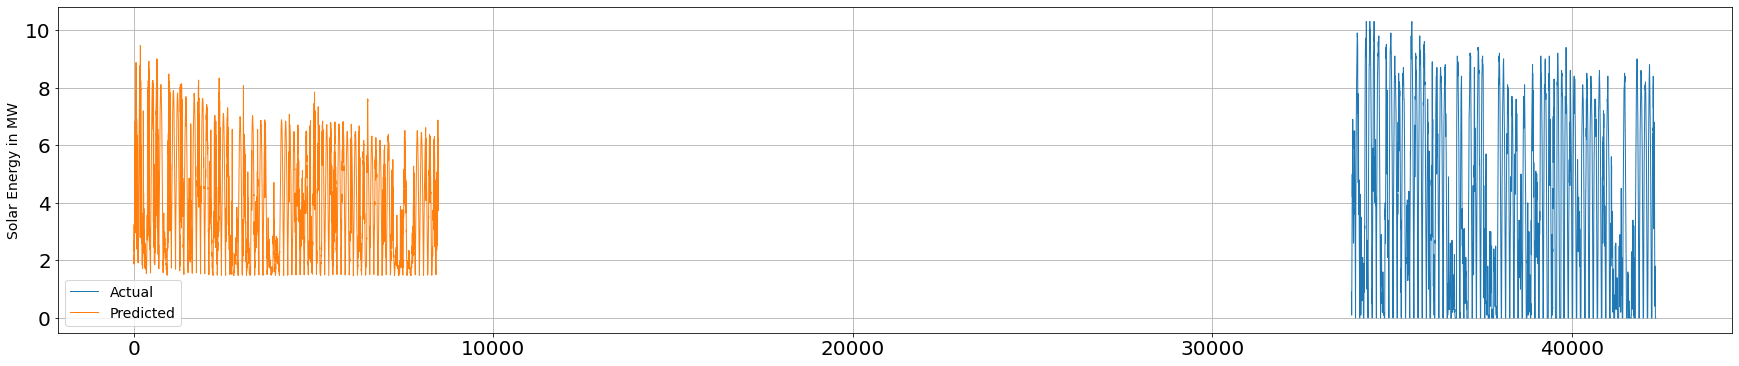

In [215]:
graph(y_test, y_prediction)

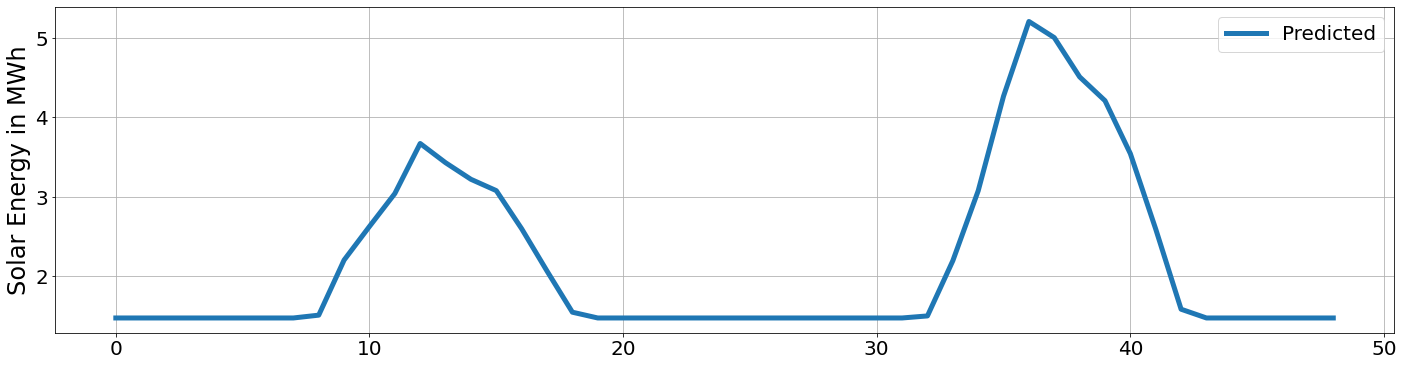

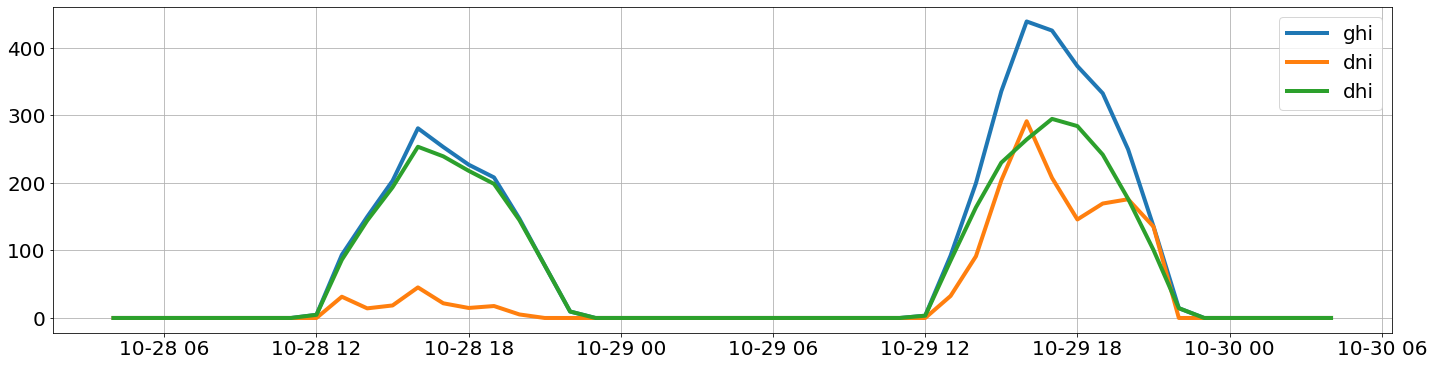

In [221]:
plt.figure(figsize = (24,6))
plt.rcParams.update({'font.size': 20})
plt.plot(y_prediction_real, linewidth=5, label= 'Predicted')
plt.grid()

plt.ylabel('Solar Energy in MWh', fontsize=24)
plt.legend(fontsize=20)

plt.figure(figsize = (24,6))

plt.plot(realtime_df['ghi'], linewidth=4, label= 'ghi')
plt.plot(realtime_df['dni'], linewidth=4, label= 'dni')
plt.plot(realtime_df['dhi'], linewidth=4, label= 'dhi')
plt.legend(fontsize=20)
plt.grid()
plt.show() 

## 